In [1]:
# -*- coding: utf-8 -*-
%pylab inline
from __future__ import division, print_function, absolute_import

import tflearn
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation

from IPython.display import display
from scipy.misc import toimage
import numpy as np
import os

Populating the interactive namespace from numpy and matplotlib


### Configuration 

* gpu_memory_fraction: GPU메모리 할당양을 정합니다.

In [2]:
tflearn.config.init_graph(gpu_memory_fraction=0.3)

gpu_options {
  per_process_gpu_memory_fraction: 0.3
}
allow_soft_placement: true

### Data

* **X shape**: (50000, 32, 32, 3) # 즉 32 * 32 이미지가 50000개 있다는 뜻
* **Y shape**: (50000, 10)
* **X Test Shape**: (10000, 32, 32, 3)
* **Y Test Shape**: (10000, 10)

In [3]:
# Data loading and preprocessing
from tflearn.datasets import cifar10
(X, Y), (X_test, Y_test) = cifar10.load_data()
X, Y = shuffle(X, Y)
Y = to_categorical(Y, 10)
Y_test = to_categorical(Y_test, 10)

### Sample Images


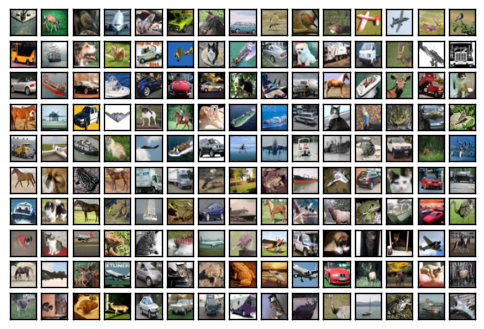

In [4]:
fig, subplots = pylab.subplots(10, 15) # subplots(y축, x축 갯수)

idx = 10
for _subs in subplots:
    for subplot in _subs:
        d = X[idx]
        subplot.get_xaxis().set_visible(False)
        subplot.get_yaxis().set_visible(False)
        subplot.imshow(d, cmap=cm.gray_r)
        idx += 1

### Data Preprocessing


In [4]:
# Real-time data preprocessing
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

In [5]:
# Real-time data augmentation
img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)

In [6]:
# Convolutional network building
network = input_data(shape=[None, 32, 32, 3],
                     data_preprocessing=img_prep,
                     data_augmentation=img_aug)
network = conv_2d(network, 256, 3, activation='relu')
network = max_pool_2d(network, 2)
network = conv_2d(network, 512, 3, activation='relu')
network = conv_2d(network, 512, 3, activation='relu')
network = max_pool_2d(network, 2)
network = fully_connected(network, 512, activation='relu')
network = fully_connected(network, 256, activation='relu')
network = dropout(network, 0.5)
network = fully_connected(network, 10, activation='softmax')
network = regression(network, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.002)

### Create Model

In [7]:
model = tflearn.DNN(network, tensorboard_verbose=0)

### Load stored data

In [ ]:
BASE_DIR = os.path.abspath(os.path.curdir)
# model.load(os.path.join(BASE_DIR, 'cifar10.tfmodel'))

### Train

In [8]:
# Train using classifier
model.fit(X, Y, n_epoch=50, shuffle=True, validation_set=(X_test, Y_test),
          show_metric=True, batch_size=96, run_id='cifar10_cnn')

Training Step: 26050  | total loss: 0.38836
| Adam | epoch: 050 | loss: 0.38836 - acc: 0.8839 | val_loss: 1.02700 - val_acc: 0.7815 -- iter: 50000/50000
Training Step: 26050  | total loss: 0.38836
| Adam | epoch: 050 | loss: 0.38836 - acc: 0.8839 | val_loss: 1.02700 - val_acc: 0.7815 -- iter: 50000/50000
--


### Save Model Data

In [ ]:
model.save('cifar10.tfmodel')

### CIFAR-10

1. airplane
2. automobile
3. bird
4. cat
5. deer 
6. dog
7. frog
8. horse
9. ship
10. truck

In [9]:
int2word = {
    0: 'Airplane',
    1: 'Automobile',
    2: 'Bird',
    3: 'Cat',
    4: 'Deer',
    5: 'Dog',
    6: 'Frog',
    7: 'Horse',
    8: 'Ship',
    9: 'Truck'
}
error_count = 0

def predict(index):
    global error_count
    p = np.argmax(model.predict(X_test[index:index+1].copy())[0], axis=0)
    a = np.argmax(Y_test[index:index+1].copy())
    if p != a:
#         display(toimage(X[index]))
#         print('Predict: %-8s   Answer: %-8s' % (int2word[p], int2word[a]))
        error_count += 1


for i in range(0,10000):
    predict(i)
    
print('Total Error Count:', error_count)

Total Error Count: 2185
